# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [15]:
!wget https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
!mv housing_market.csv?dl=0 housing_market.csv

--2022-04-23 22:12:35--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.4.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0bl91ufgvfarhjh/housing_market.csv [following]
--2022-04-23 22:12:36--  https://www.dropbox.com/s/raw/0bl91ufgvfarhjh/housing_market.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc779ac2a0481a90722363099862.dl.dropboxusercontent.com/cd/0/inline/Bj_1KswSeeSXvbEBT9YCAGCkeoFlz1BUQy_U_YWK6As3xDmNuY5GwdLJZvEG4tODxRL9XLzbO-el92n31Z5FPAFtrj_rUbVjNPxy0rjan54zHyjaDNsx3426AM16WKmnJ2-hXjcvl3AzT71PkHCowdagh3pDBMCEtKUOSO7aDbQsQQ/file# [following]
--2022-04-23 22:12:36--  https://uc779ac2a0481a90722363099862.dl.dropb

In [2]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [7]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [3]:
df = pd.read_csv("housing_market.csv")


numberEmptyEntriesTotal  = 0
    
for col in df:
    mask = df[col].isnull()
    
    numberEmptyEntriesColumn = 0
    numberOfEntries = 0
    
    for entry in mask:
        numberOfEntries += 1
        
        if(entry == True):
            numberEmptyEntriesColumn += 1
            numberEmptyEntriesTotal  += 1
            
    
    print(f"{numberEmptyEntriesColumn / numberOfEntries} dados faltantes na coluna {col}\n")
    
    
print(f"{numberEmptyEntriesTotal / len(df)} dados faltantes no total!\n")


0.0 dados faltantes na coluna id

0.0 dados faltantes na coluna timestamp

0.0 dados faltantes na coluna full_sq

0.20947786419874634 dados faltantes na coluna life_sq

0.005480620918250139 dados faltantes na coluna floor

0.31413475107479244 dados faltantes na coluna max_floor

0.31413475107479244 dados faltantes na coluna material

0.44649010534606676 dados faltantes na coluna build_year

0.31413475107479244 dados faltantes na coluna num_room

0.31413475107479244 dados faltantes na coluna kitch_sq

0.44498047323684814 dados faltantes na coluna state

0.0 dados faltantes na coluna product_type

0.0 dados faltantes na coluna sub_area

0.0 dados faltantes na coluna area_m

0.0 dados faltantes na coluna raion_popul

0.0 dados faltantes na coluna green_zone_part

0.0 dados faltantes na coluna indust_part

0.0 dados faltantes na coluna children_preschool

0.2194873814446523 dados faltantes na coluna preschool_quota

0.0 dados faltantes na coluna preschool_education_centers_raion

0.0 dados

0.0 dados faltantes na coluna green_part_2000

0.0 dados faltantes na coluna prom_part_2000

0.0 dados faltantes na coluna office_count_2000

0.0 dados faltantes na coluna office_sqm_2000

0.0 dados faltantes na coluna trc_count_2000

0.0 dados faltantes na coluna trc_sqm_2000

0.0 dados faltantes na coluna cafe_count_2000

0.056611204095697545 dados faltantes na coluna cafe_sum_2000_min_price_avg

0.056611204095697545 dados faltantes na coluna cafe_sum_2000_max_price_avg

0.056611204095697545 dados faltantes na coluna cafe_avg_price_2000

0.0 dados faltantes na coluna cafe_count_2000_na_price

0.0 dados faltantes na coluna cafe_count_2000_price_500

0.0 dados faltantes na coluna cafe_count_2000_price_1000

0.0 dados faltantes na coluna cafe_count_2000_price_1500

0.0 dados faltantes na coluna cafe_count_2000_price_2500

0.0 dados faltantes na coluna cafe_count_2000_price_4000

0.0 dados faltantes na coluna cafe_count_2000_price_high

0.0 dados faltantes na coluna big_church_count_2000

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [ ]:
'''
Como temos 261026 dados faltantes no total, podemos definir dois thresholds de valor X e Y para determinamos uma estratégia.
Se uma coluna possui uma quantidade de dados faltantes menor que X e o valor for numérico, podemos inputar dados com uma média simples, já
que, por termos muitos poucos dados faltantes, uma interpolação dos outros valores existentes serão uma média boa.

Caso o valor de dados faltantes na coluna for menor que X e não-numérico ou estiver entre os thresholds X e Y, remover só a 
instância do dado é uma estratégia plausível, pois afetaria pouco a base de dados.

Caso o valor de dados faltantes na coluna for maior que Y, significa que a coluna inteira deve ser deletada, pois tem
muitos dados faltantes para fazer uma interpolação ou só remover algumas instâncias.
'''

## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [3]:
df = pd.read_csv("housing_market.csv")
    
THRESHOLD = 95

print(f"Numero de colunas antes da limpeza: {df.shape[1]}")


for col in df:
    numberEntries = 0
    numberDuplicates = 0
    
    for entry in df[col].duplicated(keep=False):
        numberEntries += 1
        
        # Sei que é errado escrever assim, mas fica mais facil de entender oq ta acontecendo
        if(entry == True):
            numberDuplicates += 1
            
    if( (numberDuplicates / numberEntries) >= (THRESHOLD/100) ):
        print(f"Deleting Column {col}")
        df = df.drop(columns=[col])
     
        
print(f"Novo numero de colunas: {df.shape[1]}")

Numero de colunas antes da limpeza: 292
Deleting Column timestamp
Deleting Column full_sq
Deleting Column life_sq
Deleting Column floor
Deleting Column max_floor
Deleting Column material
Deleting Column build_year
Deleting Column num_room
Deleting Column kitch_sq
Deleting Column state
Deleting Column product_type
Deleting Column sub_area
Deleting Column area_m
Deleting Column raion_popul
Deleting Column green_zone_part
Deleting Column indust_part
Deleting Column children_preschool
Deleting Column preschool_quota
Deleting Column preschool_education_centers_raion
Deleting Column children_school
Deleting Column school_quota
Deleting Column school_education_centers_raion
Deleting Column school_education_centers_top_20_raion
Deleting Column hospital_beds_raion
Deleting Column healthcare_centers_raion
Deleting Column university_top_20_raion
Deleting Column sport_objects_raion
Deleting Column additional_education_raion
Deleting Column culture_objects_top_25
Deleting Column culture_objects_top

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de atribut

In [4]:
### df['num_room'].describe()

for column in df:
    # ID é uma coluna com valor numérico, mas não pode ter dados deletados!
    if(column == 'id'):
        continue
    
    desc = df[column].describe()
    # Media e Desvio padrao
    mean = float(desc['mean'])
    std  = float(desc['std'])
    
    for entry in df[column]: 
        # Tem dados que não sao numeros na base, entao obter uma media e desvio padrao pra eles
        # é impossível! Só podemos usar dados numéricos nessa estratégia
        if(not isinstance(entry, str)):
            if((entry < (mean - std) ) or (entry > (mean + std) ) ):
                print(f"{entry} provavelmente é um outlier!")

27.20955519 provavelmente é um outlier!
26.37107431 provavelmente é um outlier!
28.77287302 provavelmente é um outlier!
27.30196738 provavelmente é um outlier!
28.53362452 provavelmente é um outlier!
29.43001707 provavelmente é um outlier!
27.87743511 provavelmente é um outlier!
28.48431111 provavelmente é um outlier!
26.73451172 provavelmente é um outlier!
25.24533703 provavelmente é um outlier!
27.82845878 provavelmente é um outlier!
29.40888432 provavelmente é um outlier!
25.28597563 provavelmente é um outlier!
25.95664654 provavelmente é um outlier!
29.56159308 provavelmente é um outlier!
29.41912138 provavelmente é um outlier!
27.01325414 provavelmente é um outlier!
29.91078237 provavelmente é um outlier!
28.42854942 provavelmente é um outlier!
27.41602348 provavelmente é um outlier!
29.29222022 provavelmente é um outlier!
26.75147275 provavelmente é um outlier!
28.83412462 provavelmente é um outlier!
26.72482731 provavelmente é um outlier!
28.46023227 provavelmente é um outlier!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



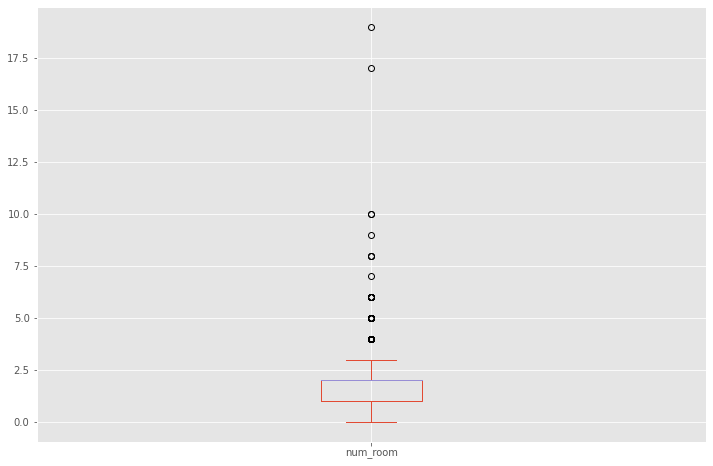

In [ ]:
df['num_room'].plot(kind="box")
## TODO...

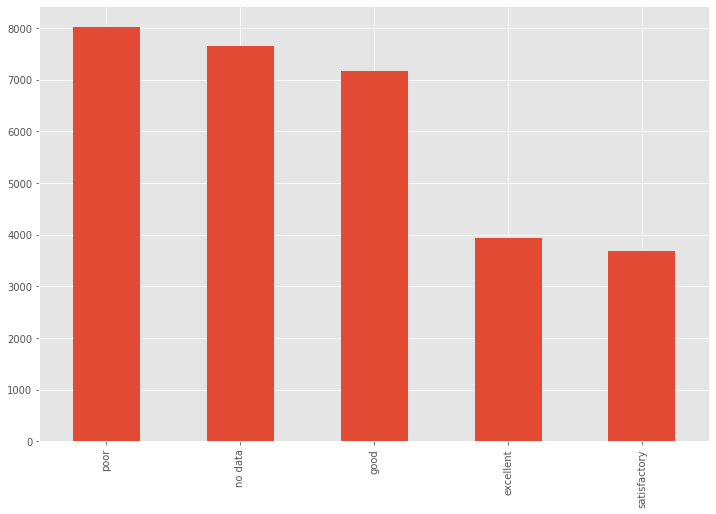

In [ ]:
df['ecology'].value_counts().plot(kind="bar")
## TODO...

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [17]:
df = pd.read_csv("./housing_market.csv")


# Tirando todas as duplicadas
df = df.drop_duplicates(keep=False)


# Tirando só usando os atributos-chave
df = df.drop_duplicates(keep=False, subset=["timestamp", "full_sq", "life_sq", "floor", "build_year", "num_room", "price_doc"])

### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [ ]:
df = pd.read_csv("housing_market.csv")

df_non_numeric = df.select_dtypes(exclude=[np.number])


for column in df_non_numeric:
    for entry in df[column]:
        # Removendo removendo espacos, colocando tudo em minusculo
        entry = entry.lower().strip().replace("_", " ").replace("-", " ")
        df[column].loc(entry) = entry

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [8]:
df = pd.read_csv("housing_market.csv")

df_non_numeric = df.select_dtypes(exclude=[np.number])

lista_atributos_binarios = ['product_type',
                            'culture_objects_top_25',
                            'thermal_power_plant_raion', 
                            'incineration_raion', 
                            'oil_chemistry_raion',
                            'radiation_raion',
                            'railroad_terminal_raion',
                            'big_market_raion',
                            'nuclear_reactor_raion',
                            'detention_facility_raion',
                            'water_1line',
                            'big_road1_1line',
                            'railroad_1line'
                           ]

df_non_numeric[lista_atributos_binarios] = df[lista_atributos_binarios].apply(lambda col:pd.Categorical(col).codes)

print(df_non_numeric)

        timestamp  product_type              sub_area  culture_objects_top_25  \
0      2011-08-20             0              Bibirevo                       0   
1      2011-08-23             0    nagatinskij zaton                        1   
2      2011-08-27             0        tekstil'shhiki                       0   
3      2011-09-01             0               Mitino                        0   
4      2011-09-05             0            basmannoe                        0   
...           ...           ...                   ...                     ...   
30466  2015-06-30             0              Otradnoe                       0   
30467  2015-06-30             0              tverskoe                       1   
30468  2015-06-30             1  Poselenie Vnukovskoe                       0   
30469  2015-06-30             0          Obruchevskoe                       0   
30470  2015-06-30             0           novogireevo                       0   

       thermal_power_plant_

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

In [ ]:
## TODO...